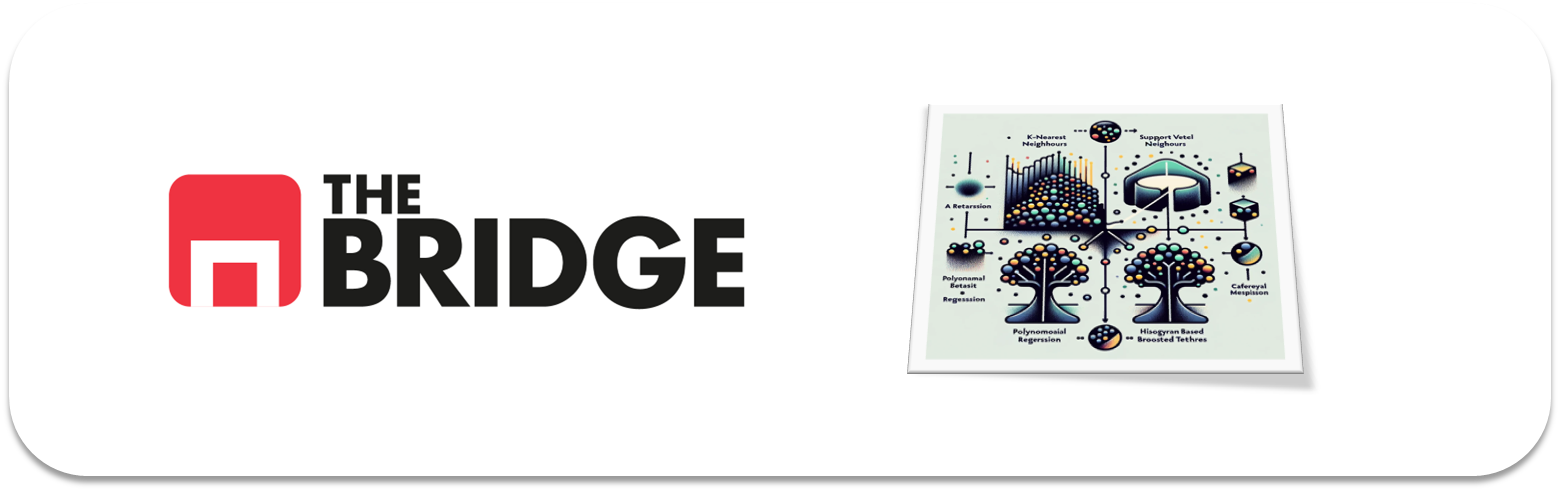

## PRACTICA OBLIGATORIA: **Repaso Aprendizaje Supervisado**

* La práctica obligatoria de esta unidad consiste en resolver sobre un mismo dataset un problema de clasificación y un problema de regresión. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor


from bootcampviztools import *

import warnings
warnings.filterwarnings('ignore')

### #1 Explicación del dataset y carga de datos

Vamos a trabajar con el dataset "Wine Quality", que es un dataset en el que se recogen diversas características fisicoquímicas de las variades tinta y blanca del "Vinho verde" portugués. Las variables del dataset se describen a continuación


1. **Acidez fija**: La mayoría de los ácidos involucrados con el vino son fijos o no volátiles (no se evaporan fácilmente).
2. **Acidez volátil**: La cantidad de ácido acético en el vino, que en niveles demasiado altos puede llevar a un sabor desagradable a vinagre.
3. **Ácido cítrico**: Encontrado en pequeñas cantidades, el ácido cítrico puede añadir 'frescura' y sabor a los vinos.
4. **Azúcar residual**: Es la cantidad de azúcar restante después de que se detiene la fermentación, es raro encontrar vinos con menos de 1 gramo/litro y vinos con más de 45 gramos/litro se consideran dulces.
5. **Cloruros**: La cantidad de sal en el vino.
6. **Dióxido de azufre libre**: La porción libre de SO2 existe en equilibrio entre el SO2 molecular (como un gas disuelto) y el ion bisulfito; previene el crecimiento microbiano y la oxidación del vino.
7. **Dióxido de azufre total**: Es la cantidad de formas libres y ligadas de S02; en bajas concentraciones, el SO2 es en su mayoría indetectable en el vino, pero en concentraciones libres de más de 50 ppm, el SO2 se hace evidente en la nariz y el sabor del vino.
8. **Densidad**: La densidad del vino es cercana a la del agua dependiendo del porcentaje de alcohol y contenido de azúcar.
9. **pH**: Describe qué tan ácido o básico es un vino en una escala de 0 (muy ácido) a 14 (muy básico); la mayoría de los vinos están entre 3-4 en la escala de pH.
10. **Sulfatos**: Un aditivo del vino que puede contribuir a los niveles de dióxido de azufre (SO2), que actúa como un antimicrobiano y antioxidante.
11. **Alcohol**: El porcentaje de contenido de alcohol del vino.
12. **Calidad**: Una variable de salida (basada en datos sensoriales, puntuación entre 0 y 10).
13. **Class**: Si es blanco o tinto.



Carga el dataset "wines_dataset.csv", muestra sus primeras filas, su información general y define dos variables target una para clasificación que permita predecir la calidad del vino según el resto de propiedas y otra variable target para regresión que permita predecir el grado alcohólico del vino a partir del resto de propiedades. 

El **objetivo de negocio en el primer problema** será anticipar la posible clasificación de sus vinos por los catadores profesionales y a partir de ahí poder planificar la producción, distribución y precio a poner a cada vino. En este sentido, el "cliente" nos dice que le gustaría poder clasificar correctamente lo mejor posible en media  (que interpretamos como el mejor recall medio posible).

El **objetivo de negocio en el segundo problema** (bastante artificial) es poder hacer simulaciones de posibles vinos futuros para saber cómo conseguir variedades más o menos alcohólicas para atender mercados diferentes. En este sentido, les interesa equivocarse lo menos posible porcentualmente sobre el grado alochólico real.

Muestra la distribución de ambos targets y haz un pequeño assesment previo de cada problema. NOTA: El dataset está limpio y sin valores faltantes.

In [2]:
df_wine = pd.read_csv("./data/wines_dataset.csv", sep='|')
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  class                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [3]:
df_wine.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
5135,6.3,0.25,0.53,1.8,0.021,41.0,101.0,0.989315,3.19,0.31,13.0,6,white
5426,7.5,0.19,0.49,1.8,0.055,19.0,110.0,0.994600,3.33,0.44,9.9,5,white
1626,6.0,0.28,0.49,6.8,0.048,61.0,222.0,0.995300,3.19,0.47,9.3,5,white
456,6.8,0.14,0.35,1.5,0.047,40.0,117.0,0.991110,3.07,0.72,11.1,6,white
2920,7.9,0.34,0.44,6.5,0.027,47.0,126.0,0.991240,2.96,0.37,12.5,6,white


In [4]:
def calcular_cardinalidad(df):
    cardinalidad = {}
    for columna in df.columns:
        cardinalidad[columna] = len(df[columna].unique()) / len(df) * 100
    return pd.DataFrame(cardinalidad.items(), columns=["Columna", "Cardinalidad (%)"])

cardinalidad = calcular_cardinalidad(df_wine)
print(cardinalidad)

                 Columna  Cardinalidad (%)
0          fixed acidity          1.631522
1       volatile acidity          2.878252
2            citric acid          1.369863
3         residual sugar          4.863783
4              chlorides          3.293828
5    free sulfur dioxide          2.077882
6   total sulfur dioxide          4.248115
7                density         15.360936
8                     pH          1.662306
9              sulphates          1.708481
10               alcohol          1.708481
11               quality          0.107742
12                 class          0.030783


In [5]:
target_reg = "alcohol"
target_class = "quality"

features_reg = [cols for cols in df_wine.columns if cols not in target_reg]
features_class = [cols for cols in df_wine.columns if cols not in target_class]

### #2 Modelado para clasificación

Crea un modelo que permita clasificar lo mejor posible los vinos en función de su calidad, o dicho de otro modo que prediga de la mejor manera posible la calidad de un vino a partir de sus propiedades químicas. ***Considéralo un problema de clasificación***, donde los valores de calidad son las clases a predecir. Puedes utilizar los modelos que creas conveniente, al menos tres, y utiliza un KNN como modelo baseline, prueba al menos con 2 valores de K. Intenta mejorar el "recall medio" con las técnicas que creas conveniente. Compara los modelos utilizando validación cruzada con o sin optimización previa de hiperparámetros (aunque en la sesión en vivo por limitación de tiempos sólo lo haremos con validación cruzada). El modelo elegido si tiene que tener un ejemplo de optimización de parámetros.

Evalúa el modelo, analiza los errores y propón algún mecanismo de mejora aunque sea sólo un esbozo.

In [6]:
train_set, test_set = train_test_split(df_wine, test_size= 0.2, stratify=df_wine[target_class], random_state= 42)

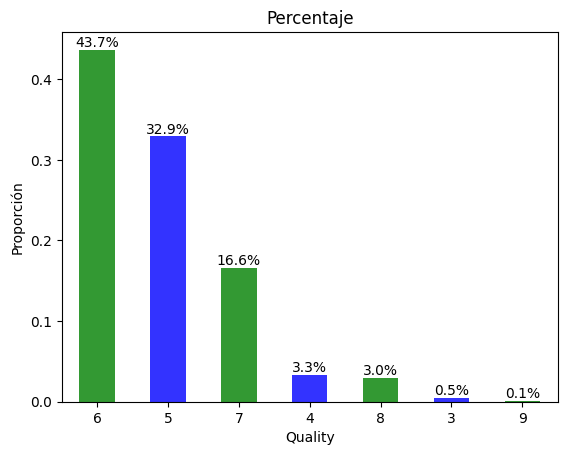

In [7]:
def bar_plot_normalized(df, columna):
    ax = train_set[columna].value_counts(normalize=True).plot(
        kind="bar", color=["green", "blue"], alpha=0.8
    )

    for p in ax.patches:
        percentage = f"{p.get_height() * 100:.1f}%"
        ax.annotate(
            percentage,
            (p.get_x() + p.get_width() / 2, p.get_height()),
            ha="center",
            va="bottom",
            fontsize=10,
        )

    plt.xlabel("Quality")
    plt.ylabel("Proporción")
    plt.title("Percentaje")
    plt.xticks(rotation=0)
    plt.show()

bar_plot_normalized(train_set, target_class)

In [8]:
train_set[target_class] = train_set[target_class].replace({9: 7, 8: 7, 3: 5, 4: 5})

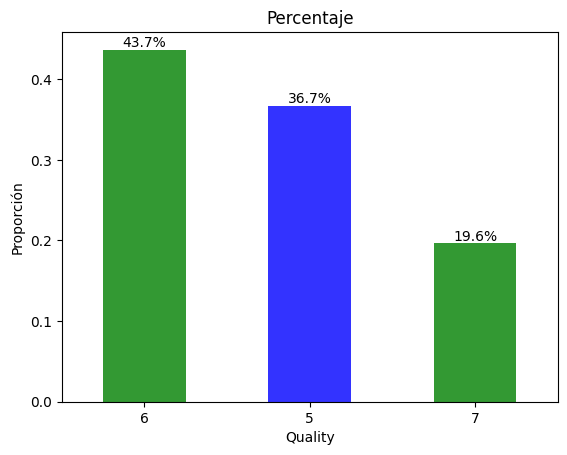

In [9]:
bar_plot_normalized(train_set, target_class)

In [10]:
train_set[target_class] = train_set[target_class].replace({5: "Clase C", 6:"Clase B", 7:"Clase A"})

**Variable categórica**

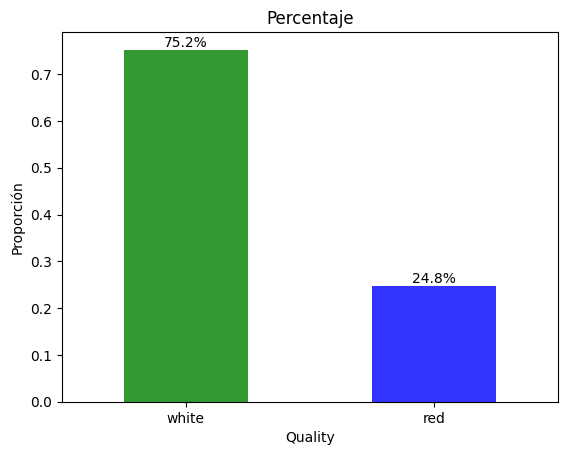

In [11]:
# class

bar_plot_normalized(train_set, "class")

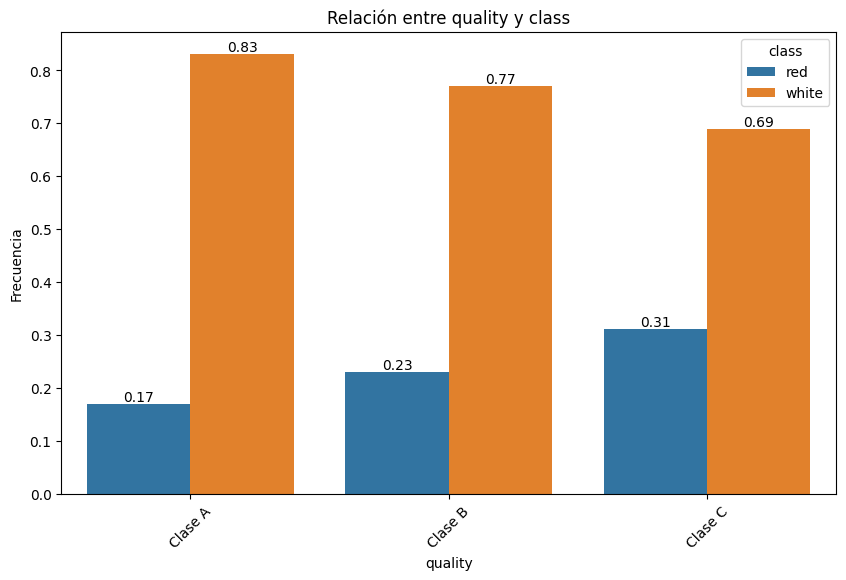

In [12]:
plot_categorical_relationship_fin(train_set, target_class, "class", show_values=True, relative_freq=True)

One-hot-encoding

In [13]:
train_set = pd.get_dummies(train_set, columns=["class"])
train_set.sample()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class_red,class_white
2495,7.3,0.19,0.27,13.9,0.057,45.0,155.0,0.99807,2.94,0.41,8.8,Clase A,False,True


**Variables numéricas**

In [14]:
df_wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'class'],
      dtype='object')

In [15]:
# fixed acidity

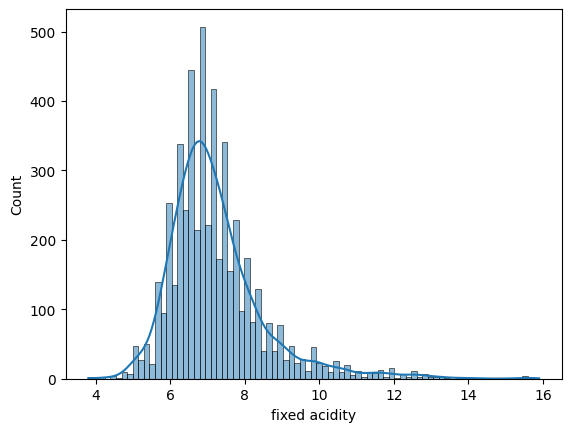

In [16]:
sns.histplot(train_set["fixed acidity"], kde=True)
plt.show()

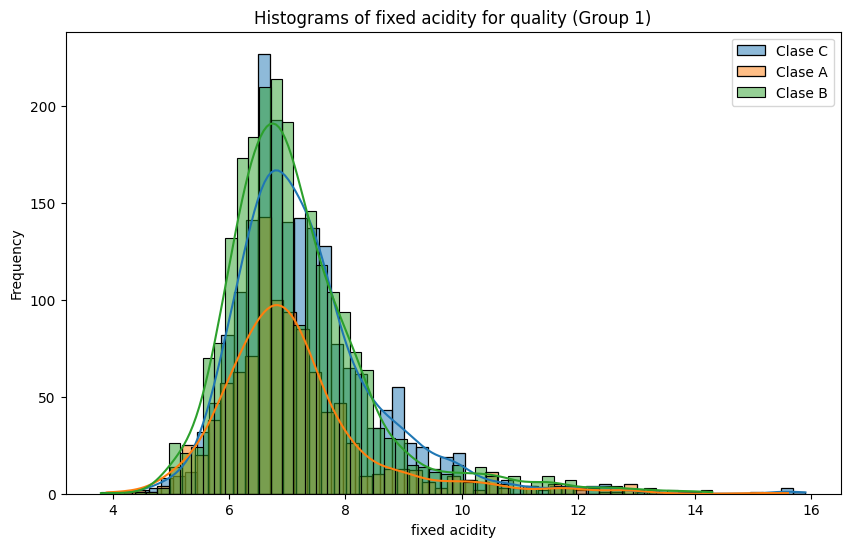

In [17]:
plot_grouped_histograms(train_set, cat_col= target_class, num_col= "fixed acidity", group_size= 5)

In [18]:
# volatile acidity

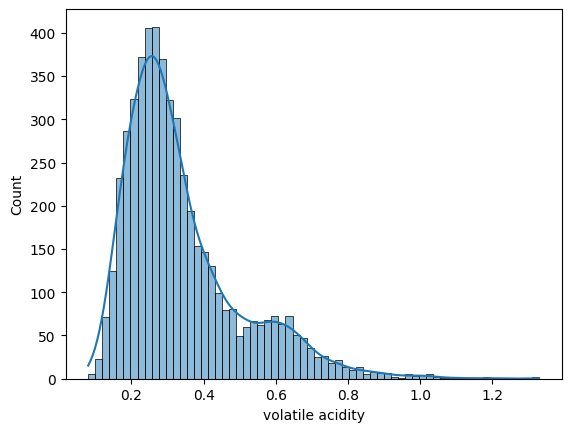

In [19]:
sns.histplot(train_set["volatile acidity"], kde=True)
plt.show()

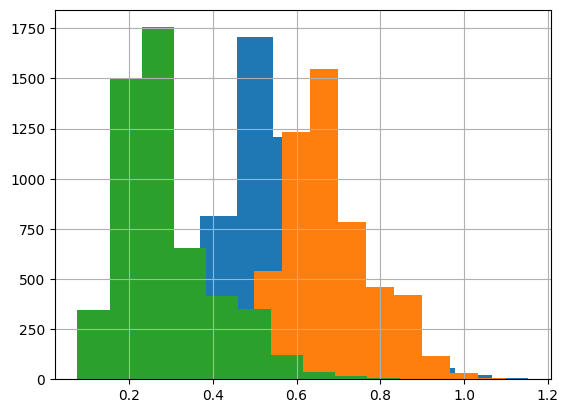

In [20]:
np.sqrt(train_set["volatile acidity"]).hist() 
np.cbrt(train_set["volatile acidity"]).hist() 
np.log(train_set["volatile acidity"] + 1).hist() 
plt.show()

In [21]:
train_set["volatile acidity"] = train_set["volatile acidity"].apply(np.sqrt)

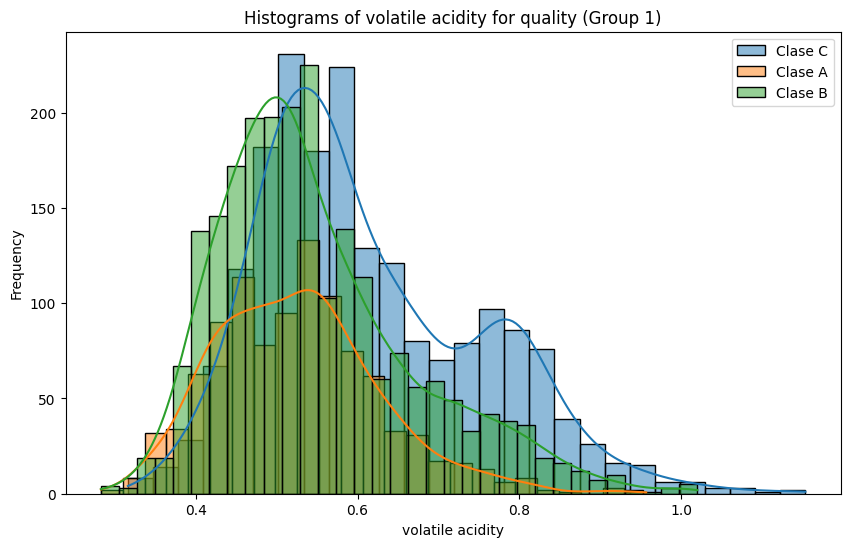

In [22]:
plot_grouped_histograms(train_set, cat_col= target_class, num_col= "volatile acidity", group_size= 5)

In [23]:
# citric acid

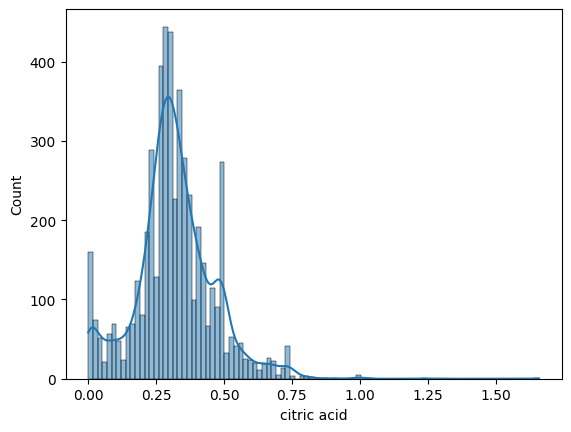

In [24]:
sns.histplot(train_set["citric acid"], kde=True)
plt.show()

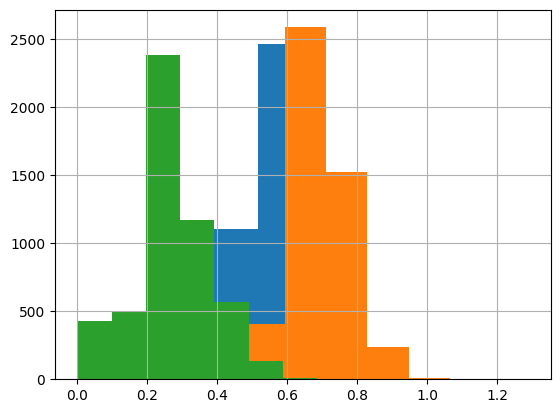

In [25]:
np.sqrt(train_set["citric acid"]).hist() 
np.cbrt(train_set["citric acid"]).hist() 
np.log(train_set["citric acid"] + 1).hist() 
plt.show()

In [26]:
train_set["citric acid"] = train_set["citric acid"].apply(np.sqrt)

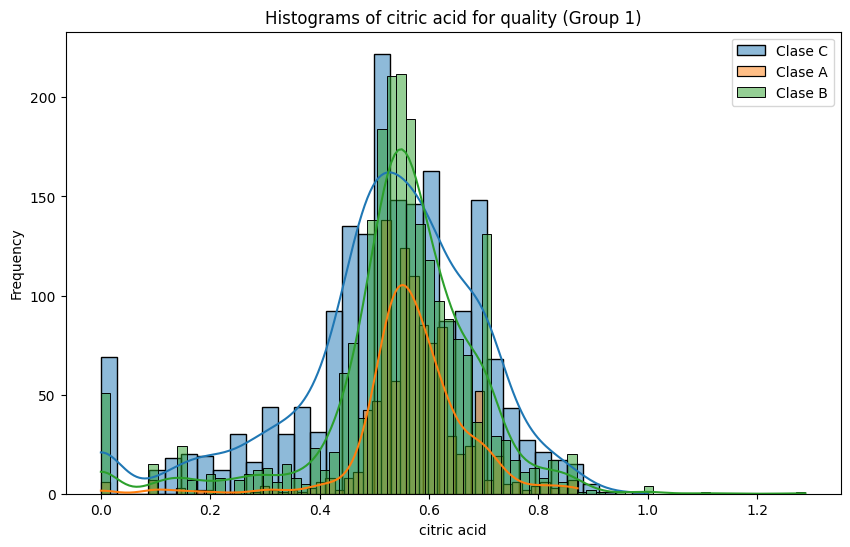

In [27]:
plot_grouped_histograms(train_set, cat_col= target_class, num_col= "citric acid", group_size= 5)

In [28]:
# residual sugar

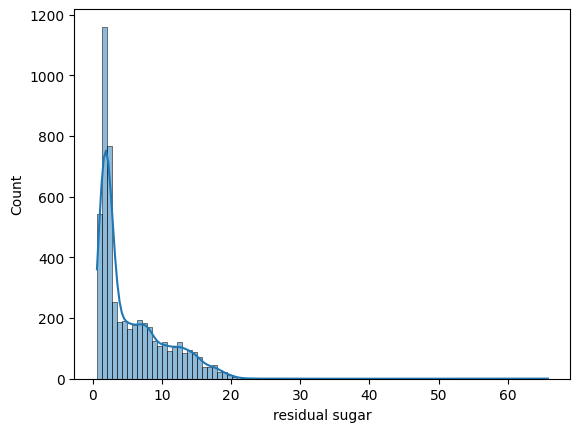

In [29]:
sns.histplot(train_set["residual sugar"], kde=True)
plt.show()

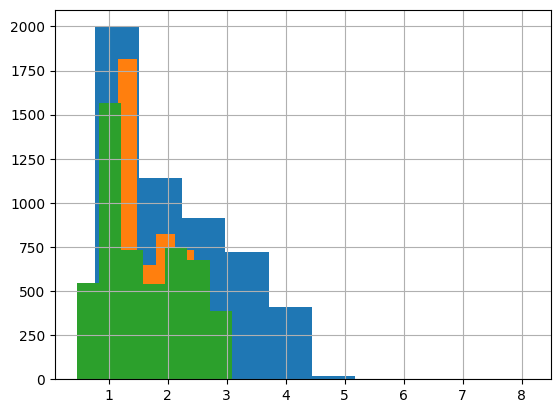

In [30]:
np.sqrt(train_set["residual sugar"]).hist() 
np.cbrt(train_set["residual sugar"]).hist() 
np.log(train_set["residual sugar"] + 1).hist() 
plt.show()

In [31]:
train_set["residual sugar"] = train_set["residual sugar"].apply(lambda x: np.log(x + 1))

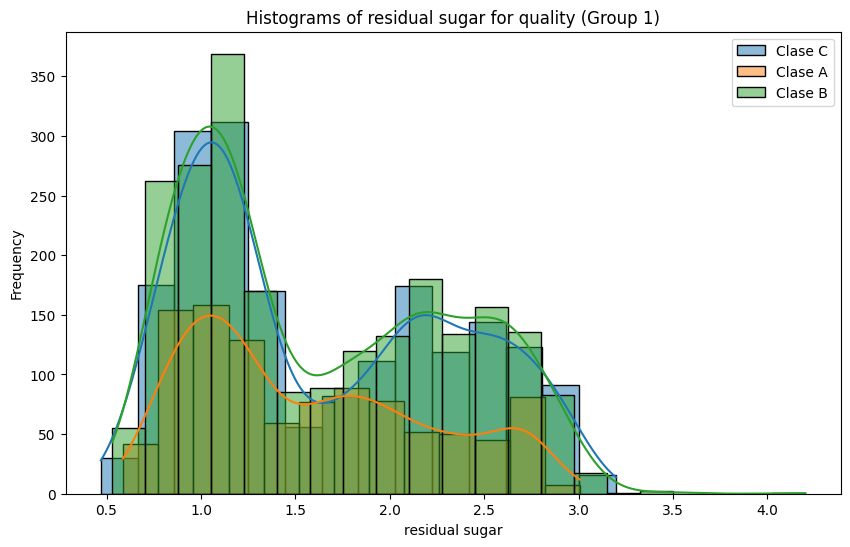

In [32]:
plot_grouped_histograms(train_set, cat_col= target_class, num_col= "residual sugar", group_size= 5)

In [33]:
# quitar residual sugar

In [34]:
train_set.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'class_red', 'class_white'],
      dtype='object')

In [35]:
# chlorides

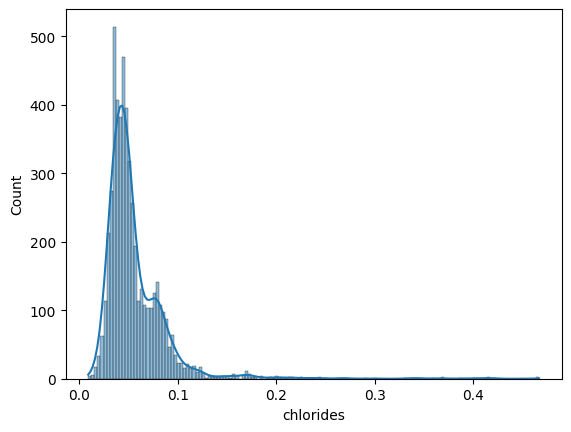

In [36]:
sns.histplot(train_set["chlorides"], kde=True)
plt.show()

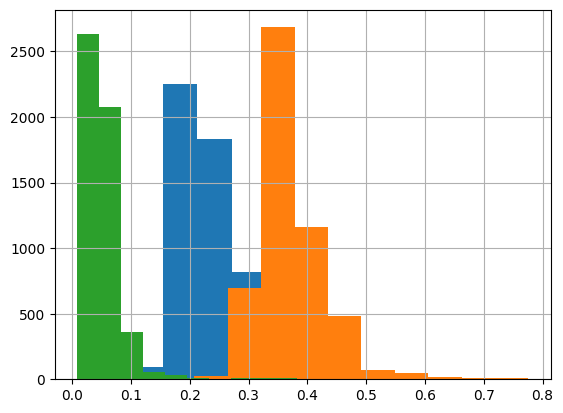

In [37]:
np.sqrt(train_set["chlorides"]).hist() 
np.cbrt(train_set["chlorides"]).hist() 
np.log(train_set["chlorides"] + 1).hist() 
plt.show()

In [38]:
train_set["chlorides"] = train_set["chlorides"].apply(np.cbrt)

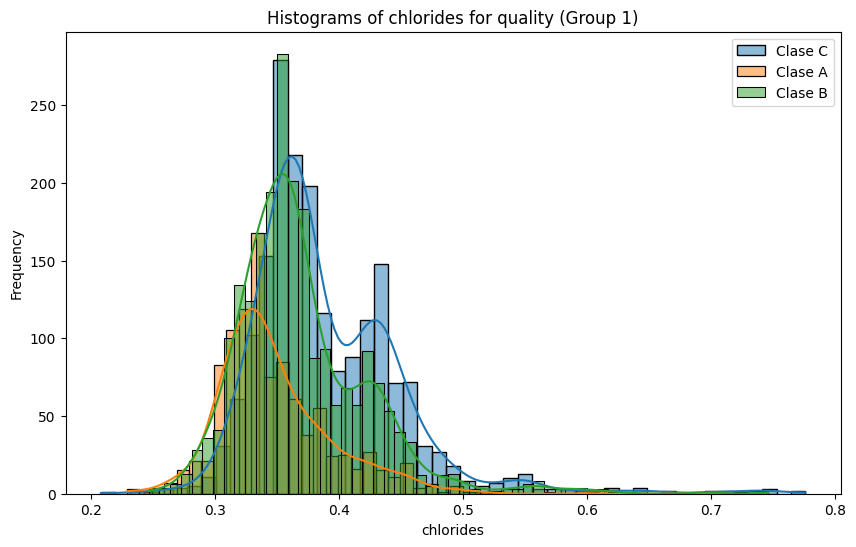

In [39]:
plot_grouped_histograms(train_set, cat_col= target_class, num_col= "chlorides", group_size= 5)

In [40]:
# free sulfur dioxide

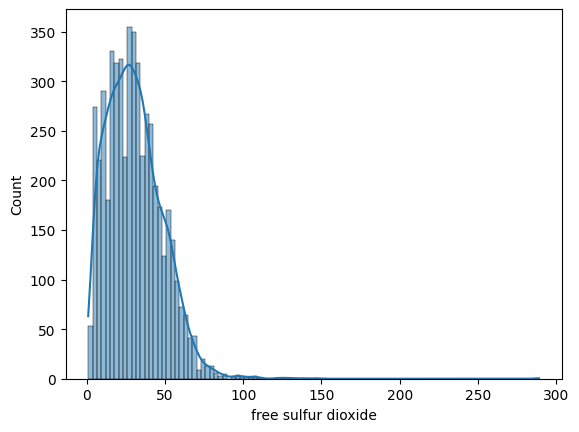

In [41]:
sns.histplot(train_set["free sulfur dioxide"], kde=True)
plt.show()

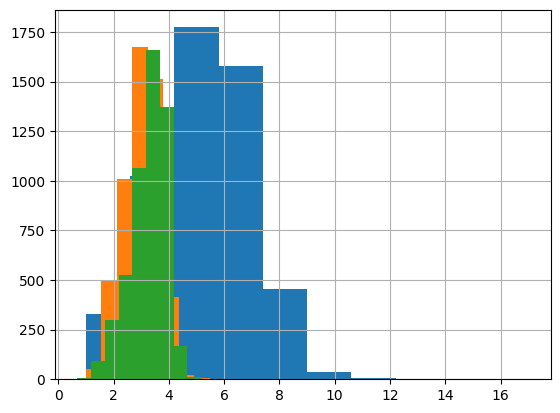

In [42]:
np.sqrt(train_set["free sulfur dioxide"]).hist() 
np.cbrt(train_set["free sulfur dioxide"]).hist() 
np.log(train_set["free sulfur dioxide"] + 1).hist() 
plt.show()

In [43]:
train_set["free sulfur dioxide"] = train_set["free sulfur dioxide"].apply(np.sqrt)

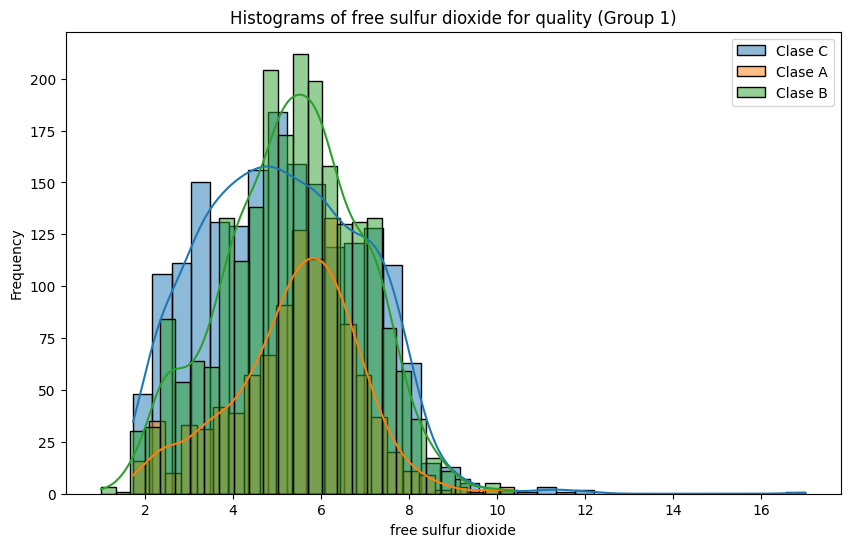

In [44]:
plot_grouped_histograms(train_set, cat_col= target_class, num_col= "free sulfur dioxide", group_size= 5)

In [45]:
# total sulfur dioxide

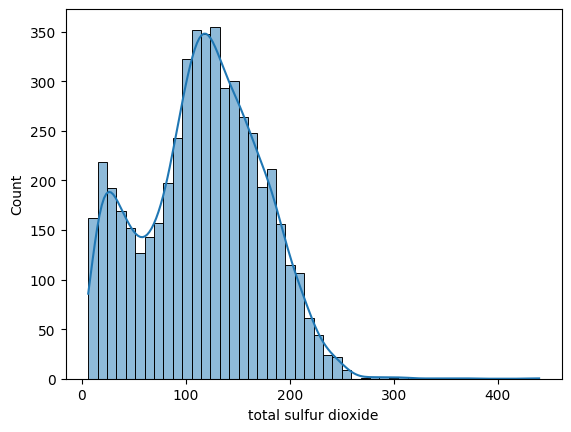

In [46]:
sns.histplot(train_set["total sulfur dioxide"], kde=True)
plt.show()

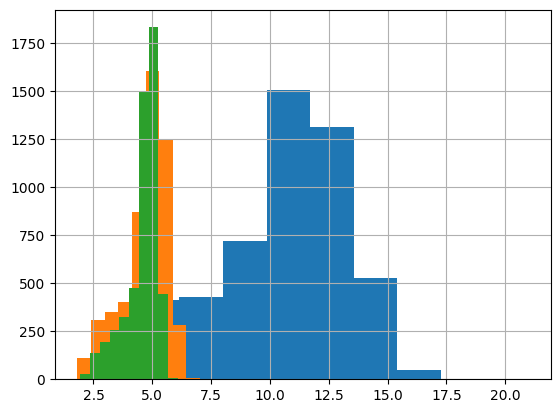

In [47]:
np.sqrt(train_set["total sulfur dioxide"]).hist() 
np.cbrt(train_set["total sulfur dioxide"]).hist() 
np.log(train_set["total sulfur dioxide"] + 1).hist() 
plt.show()

In [48]:
train_set["total sulfur dioxide"] = train_set["total sulfur dioxide"].apply(np.sqrt)

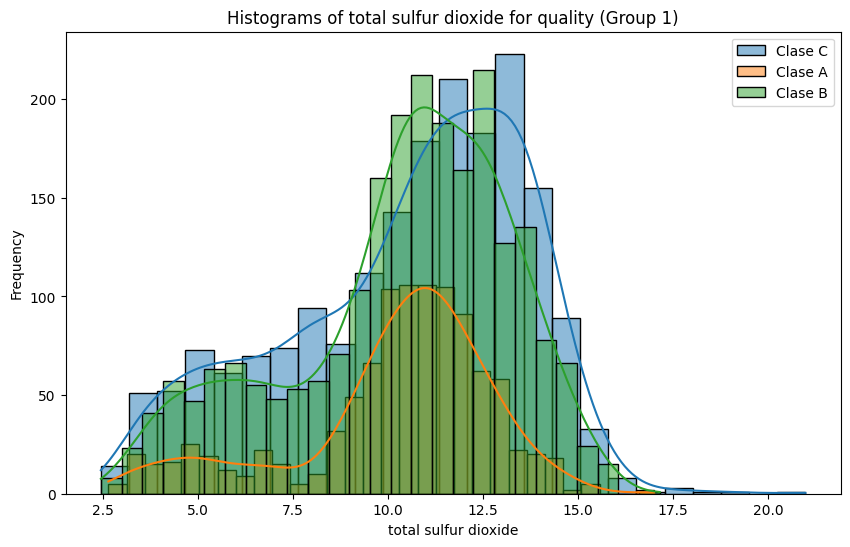

In [49]:
plot_grouped_histograms(train_set, cat_col= target_class, num_col= "total sulfur dioxide", group_size= 5)

In [50]:
# density

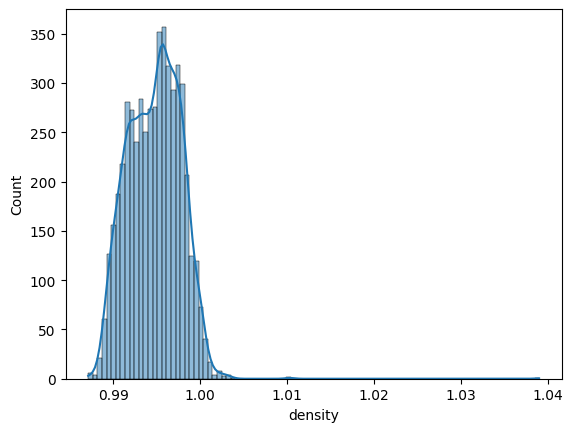

In [51]:
sns.histplot(train_set["density"], kde=True)
plt.show()

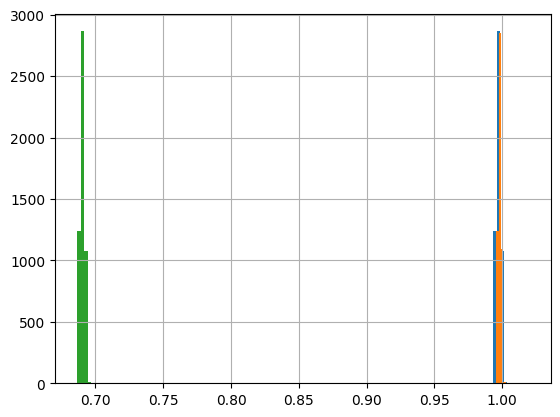

In [52]:
np.sqrt(train_set["density"]).hist() 
np.cbrt(train_set["density"]).hist() 
np.log(train_set["density"] + 1).hist() 
plt.show()

In [53]:
train_set["density"] = train_set["density"].apply(np.sqrt)

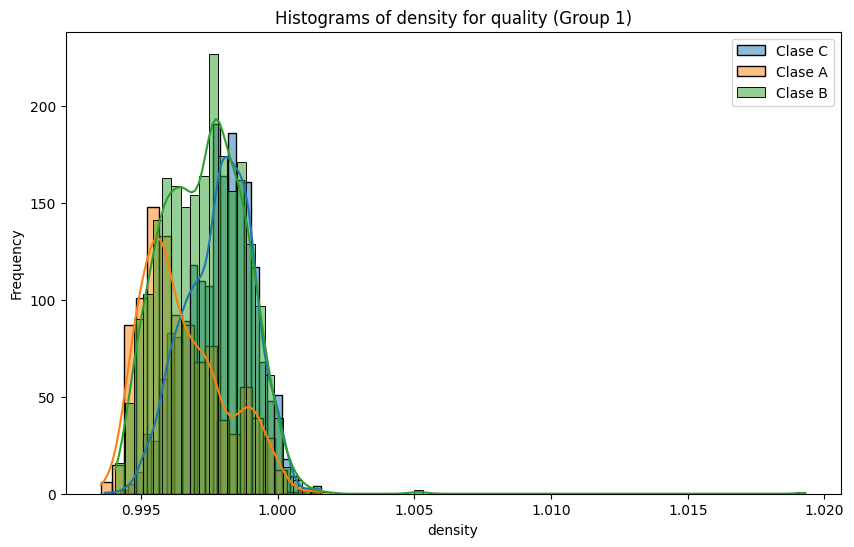

In [54]:
plot_grouped_histograms(train_set, cat_col= target_class, num_col= "density", group_size= 5)

In [55]:
# pH

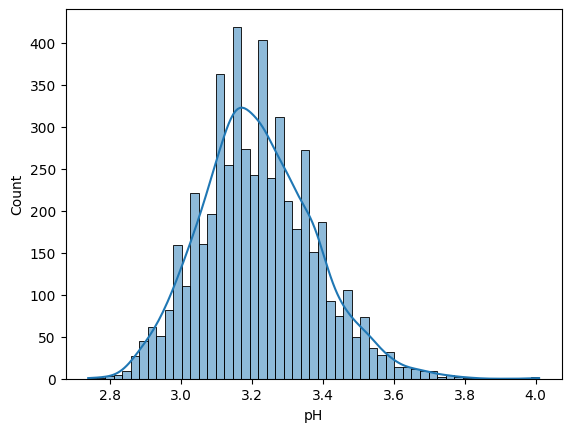

In [56]:
sns.histplot(train_set["pH"], kde=True)
plt.show()

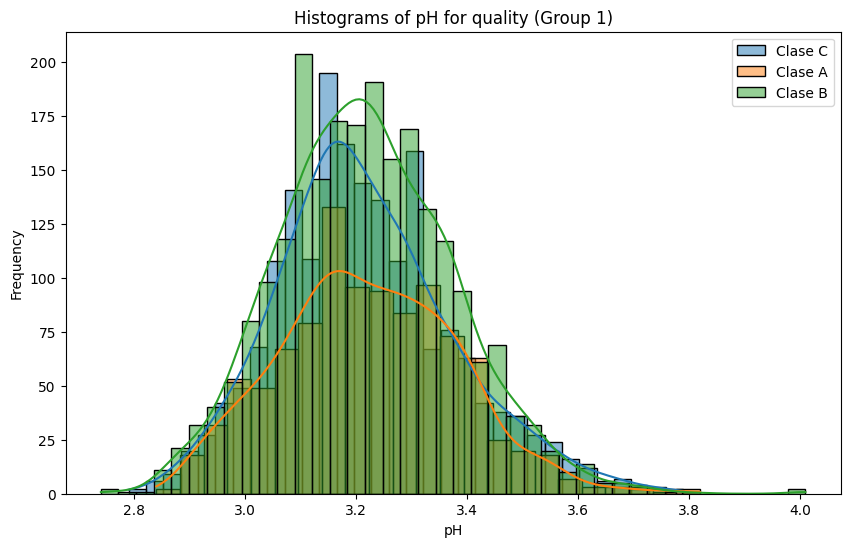

In [57]:
plot_grouped_histograms(train_set, cat_col= target_class, num_col= "pH", group_size= 5)

In [58]:
# sulphates

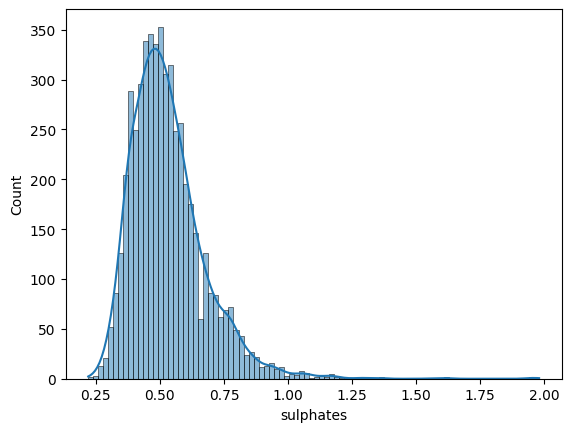

In [59]:
sns.histplot(train_set["sulphates"], kde=True)
plt.show()

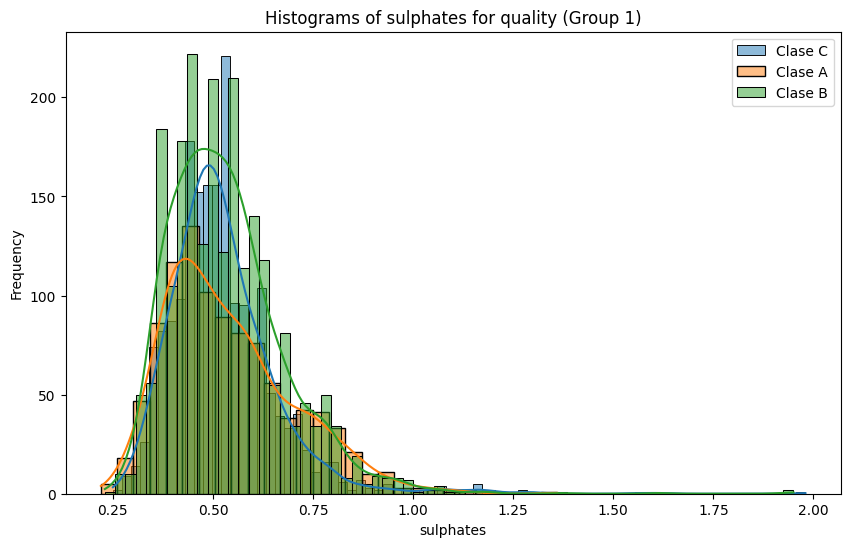

In [60]:
plot_grouped_histograms(train_set, cat_col= target_class, num_col= "sulphates", group_size= 5)

In [61]:
# alcohol

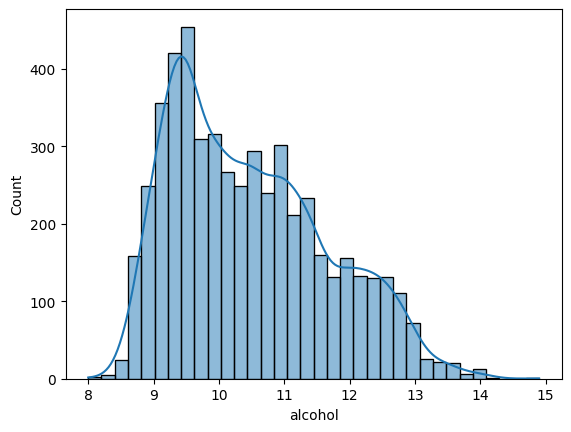

In [62]:
sns.histplot(train_set["alcohol"], kde=True)
plt.show()

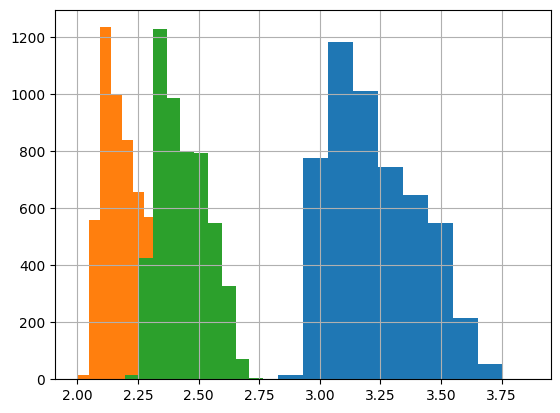

In [63]:
np.sqrt(train_set["alcohol"]).hist() 
np.cbrt(train_set["alcohol"]).hist() 
np.log(train_set["alcohol"] + 1).hist() 
plt.show()

In [64]:
train_set["alcohol"] = train_set["alcohol"].apply(np.sqrt)

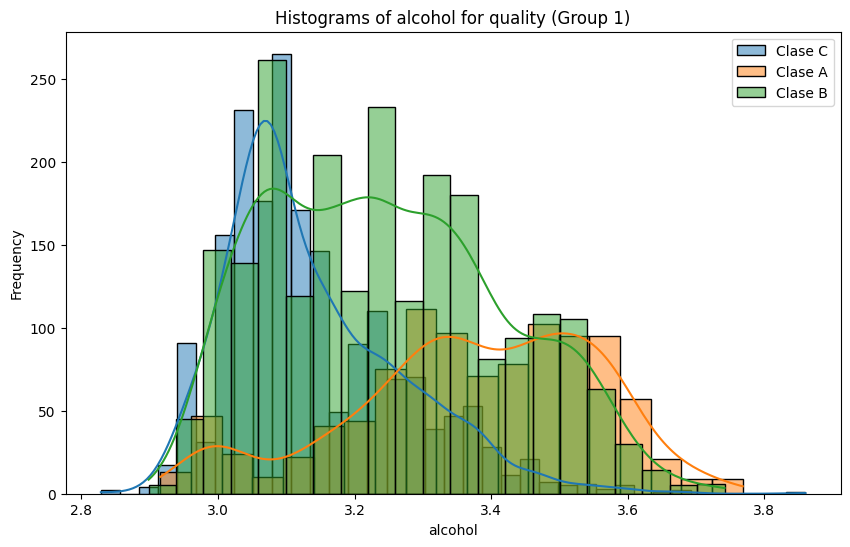

In [65]:
plot_grouped_histograms(train_set, cat_col= target_class, num_col= "alcohol", group_size= 5)

In [66]:
train_set.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'class_red', 'class_white'],
      dtype='object')

Escalonando

In [67]:
features_cat = ["class_red", "class_white"]
features_num = ["fixed acidity", "volatile acidity", "citric acid", "chlorides", "free sulfur dioxide", "total sulfur dioxide", "density", \
                "pH", "sulphates", "alcohol"]

In [68]:
scaler_num = StandardScaler()
train_set[features_num] = scaler_num.fit_transform(train_set[features_num])

In [69]:
# Aplicando todas las transformaciones a test_set

test_set = pd.get_dummies(test_set, columns=["class"])
test_set[target_class] = test_set[target_class].replace({9: 7, 8: 7, 3: 5, 4: 5})
test_set[target_class] = test_set[target_class].replace({5: "Clase C", 6:"Clase B", 7:"Clase A"})



test_set["volatile acidity"] = test_set["volatile acidity"].apply(np.sqrt)
test_set["citric acid"] = test_set["citric acid"].apply(np.sqrt)
test_set["chlorides"] = test_set["chlorides"].apply(np.cbrt)
test_set["free sulfur dioxide"] = test_set["free sulfur dioxide"].apply(np.sqrt)
test_set["total sulfur dioxide"] = test_set["total sulfur dioxide"].apply(np.sqrt)
test_set["density"] = test_set["density"].apply(np.sqrt)
test_set["alcohol"] = test_set["alcohol"].apply(np.sqrt)
test_set[features_num] = scaler_num.transform(test_set[features_num])


In [70]:
features = features_cat + features_num

In [71]:
X_train = train_set[features]
y_train = train_set[target_class]

X_test = test_set[features]
y_test = test_set[target_class]

In [72]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(5197, 12)
(5197,)
(1300, 12)
(1300,)


In [80]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint

rf_params = {
    'n_estimators': [50, 100, 200],  
    'max_depth': [10, 15, 20],        
    'min_samples_split': [10, 20],   
    'min_samples_leaf': [5, 10],      
    'max_features': ['sqrt', 'log2'],  
    'bootstrap': [True]  
}

rf_clf = RandomForestClassifier()

random_search_rf = RandomizedSearchCV(
    estimator=rf_clf,
    param_distributions=rf_params,
    n_iter=100, 
    cv=5, 
    verbose=2, 
    n_jobs=-1, 
    random_state=42,
    scoring='balanced_accuracy'
)

random_search_rf.fit(X_train, y_train)


Fitting 5 folds for each of 72 candidates, totalling 360 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True],
                                        'max_depth': [10, 15, 20],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [5, 10],
                                        'min_samples_split': [10, 20],
                                        'n_estimators': [50, 100, 200]},
                   random_state=42, scoring='balanced_accuracy', verbose=2)

In [81]:
random_search_rf.best_params_

{'n_estimators': 200,
 'min_samples_split': 10,
 'min_samples_leaf': 5,
 'max_features': 'sqrt',
 'max_depth': 20,
 'bootstrap': True}

In [82]:
best_rf = random_search_rf.best_estimator_
y_pred_rf = best_rf.predict(X_train)
print(classification_report(y_train, y_pred_rf))

              precision    recall  f1-score   support

     Clase A       0.95      0.82      0.88      1021
     Clase B       0.87      0.93      0.90      2269
     Clase C       0.92      0.90      0.91      1907

    accuracy                           0.90      5197
   macro avg       0.91      0.89      0.90      5197
weighted avg       0.90      0.90      0.90      5197



In [83]:
best_rf = random_search_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

     Clase A       0.72      0.54      0.62       256
     Clase B       0.64      0.74      0.69       567
     Clase C       0.76      0.73      0.74       477

    accuracy                           0.70      1300
   macro avg       0.71      0.67      0.68      1300
weighted avg       0.70      0.70      0.69      1300



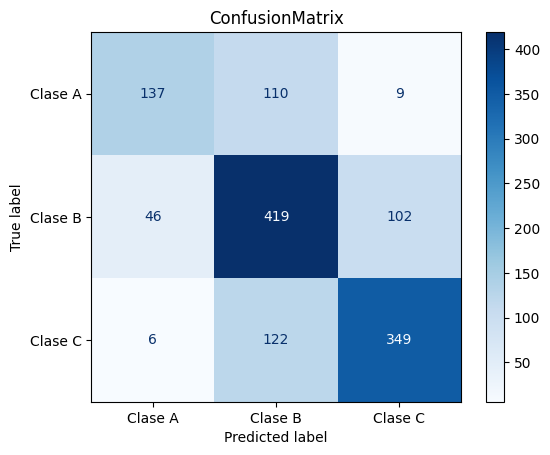

In [86]:
cm = confusion_matrix(y_test, y_pred_rf)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Clase A', 'Clase B', 'Clase C'])
disp.plot(cmap='Blues', values_format='d') 
plt.title('ConfusionMatrix')
plt.show()

In [87]:
# lightgbm

from lightgbm import LGBMClassifier

In [89]:
from lightgbm import LGBMClassifier

lgbm_params = {
    'n_estimators': [50, 100, 200],  
    'max_depth': [10, 15, 20],        
    'learning_rate': [0.01, 0.1, 0.2],  
    'min_child_samples': [5, 10, 20],  
    'subsample': [0.7, 0.8, 1.0], 
    'colsample_bytree': [0.7, 0.8, 1.0],  
    'num_leaves': [31, 50, 100],  
}

lgbm_clf = LGBMClassifier()

random_search_lgbm = RandomizedSearchCV(
    estimator=lgbm_clf,
    param_distributions=lgbm_params,
    n_iter=100, 
    cv=5, 
    verbose=2, 
    n_jobs=-1, 
    random_state=42,
    scoring='balanced_accuracy'
)

random_search_lgbm.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008556 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1309
[LightGBM] [Info] Number of data points in the train set: 5197, number of used features: 12
[LightGBM] [Info] Start training from score -1.627299
[LightGBM] [Info] Start training from score -0.828742
[LightGBM] [Info] Start training from score -1.002550


RandomizedSearchCV(cv=5, estimator=LGBMClassifier(), n_iter=100, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.7, 0.8, 1.0],
                                        'learning_rate': [0.01, 0.1, 0.2],
                                        'max_depth': [10, 15, 20],
                                        'min_child_samples': [5, 10, 20],
                                        'n_estimators': [50, 100, 200],
                                        'num_leaves': [31, 50, 100],
                                        'subsample': [0.7, 0.8, 1.0]},
                   random_state=42, scoring='balanced_accuracy', verbose=2)

In [91]:
random_search_lgbm.best_params_

{'subsample': 0.7,
 'num_leaves': 50,
 'n_estimators': 200,
 'min_child_samples': 10,
 'max_depth': 20,
 'learning_rate': 0.1,
 'colsample_bytree': 0.8}

In [92]:
best_lgbm = random_search_lgbm.best_estimator_
y_pred_lgbm = best_lgbm.predict(X_train)
print(classification_report(y_train, y_pred_lgbm))

              precision    recall  f1-score   support

     Clase A       1.00      1.00      1.00      1021
     Clase B       1.00      1.00      1.00      2269
     Clase C       1.00      1.00      1.00      1907

    accuracy                           1.00      5197
   macro avg       1.00      1.00      1.00      5197
weighted avg       1.00      1.00      1.00      5197



In [93]:
best_lgbm = random_search_lgbm.best_estimator_
y_pred_lgbm = best_lgbm.predict(X_test)
print(classification_report(y_test, y_pred_lgbm))

              precision    recall  f1-score   support

     Clase A       0.74      0.58      0.65       256
     Clase B       0.66      0.75      0.70       567
     Clase C       0.77      0.74      0.75       477

    accuracy                           0.71      1300
   macro avg       0.72      0.69      0.70      1300
weighted avg       0.72      0.71      0.71      1300



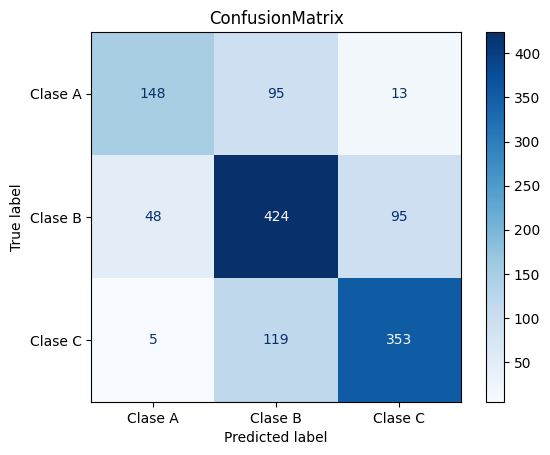

In [94]:
cm = confusion_matrix(y_test, y_pred_lgbm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Clase A', 'Clase B', 'Clase C'])
disp.plot(cmap='Blues', values_format='d') 
plt.title('ConfusionMatrix')
plt.show()

### #3 Modelado para regresión

Reutiliza todo lo que puedas la preparación del modelado de la parte anterior y construye ahora el mejor modelo que puedas para predecir el grado alcohólico de un vino dadas sus características fisico químicas, su clase y la puntuación de calidad que le ha sido otorgada. Compara al menos tres tipos de modelos, seleccionando una métrica adecuada de comparación y escoge el más apropiado empleando validación cruzada antes o después de optimizar hiperparámetros (en la sesión en vivo lo haremos antes por cuestiones de tiempo). Evalúa el modelo escogido y con los hiperparámetros ajustados de la mejor manera que puedas. Para terminar realizar un pequeño análisis de errores.

In [ ]:
train_set = pd.get_dummies(train_set, columns=["quality"])
test_set = pd.get_dummies(test_set, columns=["quality"])

In [108]:
train_set.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'class_red', 'class_white',
       'quality_Clase A', 'quality_Clase B', 'quality_Clase C'],
      dtype='object')

In [ ]:
train_set["quality"]

In [114]:
features_cat = ["class_red", "class_white", "quality_Clase A", "quality_Clase B", "quality_Clase C"]
features_num = ["fixed acidity", "volatile acidity", "citric acid", "chlorides", "free sulfur dioxide", "total sulfur dioxide", "density", \
                "pH", "sulphates"]

In [115]:
features = features_cat + features_num

In [116]:
X_train = train_set[features]
y_train = train_set[target_reg]

X_test = test_set[features]
y_test = test_set[target_reg]

In [117]:
# RandomForestRegressor

from sklearn.ensemble import RandomForestRegressor


In [118]:

rf_params = {
    'n_estimators': [50, 100, 200, 500],  
    'max_depth': [10, 20, 30, None],        
    'min_samples_split': [2, 5, 10],   
    'min_samples_leaf': [1, 2, 4],      
    'max_features': ['sqrt', 'log2', None],  
    'bootstrap': [True, False]  
}

rf_regressor = RandomForestRegressor()

random_search_rf_reg = RandomizedSearchCV(
    estimator=rf_regressor,
    param_distributions=rf_params,
    n_iter=100, 
    cv=5,  
    verbose=2,  
    n_jobs=-1,  
    random_state=42,
    scoring='r2'
)

random_search_rf_reg.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, None],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200, 500]},
                   random_state=42, scoring='r2', verbose=2)

In [119]:
random_search_rf_reg.best_params_

{'n_estimators': 500,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': None,
 'max_depth': 30,
 'bootstrap': True}

In [120]:
best_rf_reg = random_search_rf_reg.best_estimator_
y_pred_rf_reg = best_rf_reg.predict(X_train)

In [121]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_train, y_pred_rf_reg)
rmse = np.sqrt(mse)
r2 = r2_score(y_train, y_pred_rf_reg)

print(f"Error Cuadrático Medio (MSE): {mse:.4f}")
print(f"Raíz del Error Cuadrático Medio (RMSE): {rmse:.4f}")
print(f"Coeficiente de Determinación (R²): {r2:.4f}")

Error Cuadrático Medio (MSE): 0.0229
Raíz del Error Cuadrático Medio (RMSE): 0.1514
Coeficiente de Determinación (R²): 0.9771


In [122]:
best_rf_reg = random_search_rf_reg.best_estimator_
y_pred_rf_reg = best_rf_reg.predict(X_test)

In [123]:
mse = mean_squared_error(y_test, y_pred_rf_reg)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_rf_reg)

print(f"Error Cuadrático Medio (MSE): {mse:.4f}")
print(f"Raíz del Error Cuadrático Medio (RMSE): {rmse:.4f}")
print(f"Coeficiente de Determinación (R²): {r2:.4f}")

Error Cuadrático Medio (MSE): 0.1729
Raíz del Error Cuadrático Medio (RMSE): 0.4159
Coeficiente de Determinación (R²): 0.8360


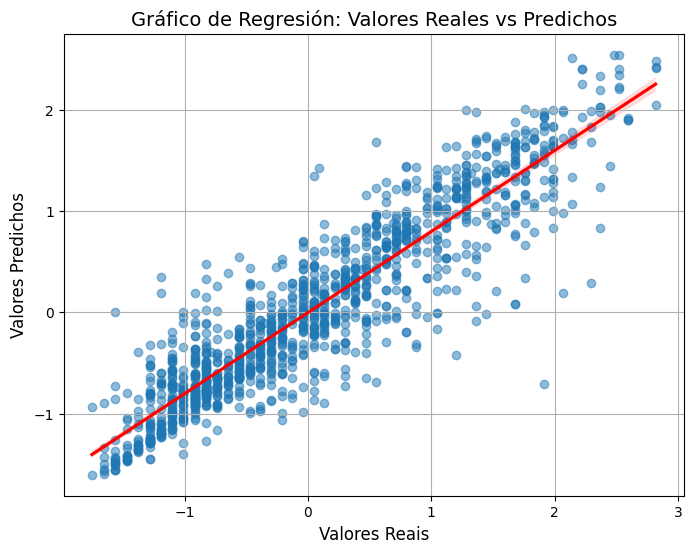

In [124]:
plt.figure(figsize=(8, 6))
sns.regplot(x=y_test, y=y_pred_rf_reg, scatter_kws={"alpha": 0.5}, line_kws={"color": "red"})

plt.xlabel("Valores Reais", fontsize=12)
plt.ylabel("Valores Predichos", fontsize=12)
plt.title("Gráfico de Regresión: Valores Reales vs Predichos", fontsize=14)
plt.grid(True)

plt.show()